In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import skimage
from skimage import filters
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!pip install largestinteriorrectangle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_img(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        #img = np.array(Image.open(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
        #print(filename)
    return images

In [ ]:
#gaussian_blur_images = load_img('/content/drive/MyDrive/stage1_data/gaussian_blur')

In [ ]:
def load_img_stereo(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename),0)
        #img = np.array(Image.open(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
        #print(filename)
    return images

In [ ]:
def load_img_stereo(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename),0)
        #img = np.array(Image.open(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
        #print(filename)
    return images

In [ ]:
stereo_left = load_img_stereo('/content/drive/MyDrive/stage2_stereo/left_imgs')

In [ ]:
stereo_right = load_img_stereo('/content/drive/MyDrive/stage2_stereo/right_imgs')

In [ ]:
stereo_disp= load_img_stereo('/content/drive/MyDrive/stage2_stereo/disparities')

In [ ]:
rec_in = load_img('/content/drive/MyDrive/stage2_rectification/input_imgs')

In [ ]:
rec_warp = load_img('/content/drive/MyDrive/stage2_rectification/warped_imgs')

In [ ]:
rec_warp[0].shape

(512, 1392, 3)

# Part 1

In [ ]:
import largestinteriorrectangle as lir
import cv2
import numpy as np

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

def psnr_ssim_rect(orig_img, rectified_img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(rectified_img, cv2.COLOR_BGR2GRAY)
    # Threshold the image to create a binary image (black and white)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    grid = thresh.astype(np.bool)

    rectangle = lir.lir(grid)

    (x_min, y_min) = lir.pt1(rectangle)
    (x_max, y_max) = lir.pt2(rectangle)

    # Crop the image using the inscribed rectangle's coordinates
    cropped_img = orig_img[y_min:y_max, x_min:x_max]
    cropped_img_rect = rectified_img[y_min:y_max, x_min:x_max]


    psnr_out = psnr(cropped_img, cropped_img_rect)
    ssim_out = ssim(cropped_img, cropped_img_rect, multichannel=True)

    return (psnr_out, ssim_out)

In [ ]:
warped_img = rec_warp[1]
warped_img_int8 = (warped_img).astype(np.uint8)
gray = cv2.cvtColor(warped_img_int8, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create()

kp, descriptors = sift.detectAndCompute(gray, None)

img_kp = cv2.drawKeypoints(warped_img_int8, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#img = np.array()
#warped_img = (warped_img*255).astype
#sift = cv2.SIFT_create()

In [ ]:
warped_img = rec_warp[1]
warped_img_int8 = (warped_img).astype(np.uint8)
gray = cv2.cvtColor(warped_img_int8, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create()

kp, descriptors = sift.detectAndCompute(gray, None)

img_kp = cv2.drawKeypoints(warped_img_int8, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
src_pts = np.float32([kp[i].pt for i in range(len(kp))]).reshape(-1, 1, 2)
dst_pts = np.float32([kp[i].pt for i in range(len(kp))]).reshape(-1, 1, 2)

# Calculate the homography matrix using RANSAC algorithm
homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(homography)
desired_width = 1392
desired_height = 512

# Calculate the output size based on the desired dimensions
output_size = (desired_width, desired_height)

# Unwarp the image
unwarped_img = cv2.warpPerspective(warped_img_int8, homography, output_size)


Homography Matrix:
[[ 1.00000000e+00 -4.14082347e-16 -5.05252743e-12]
 [ 5.85034955e-16  1.00000000e+00 -1.21307741e-12]
 [ 3.05875521e-18 -3.10103056e-19  1.00000000e+00]]


In [ ]:
src_pts = np.float32([kp[i].pt for i in range(len(kp))]).reshape(-1, 1, 2)
dst_pts = np.float32([kp[i].pt for i in range(len(kp))]).reshape(-1, 1, 2)

# Calculate the homography matrix using RANSAC algorithm
homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Print the homography matrix
print("Homography Matrix:")
print(homography)

Homography Matrix:
[[ 1.00000000e+00 -4.14082347e-16 -5.05252743e-12]
 [ 5.85034955e-16  1.00000000e+00 -1.21307741e-12]
 [ 3.05875521e-18 -3.10103056e-19  1.00000000e+00]]


In [ ]:
rec_in[0].shape

(512, 1392, 3)

In [ ]:
from google.colab.patches import cv2_imshow

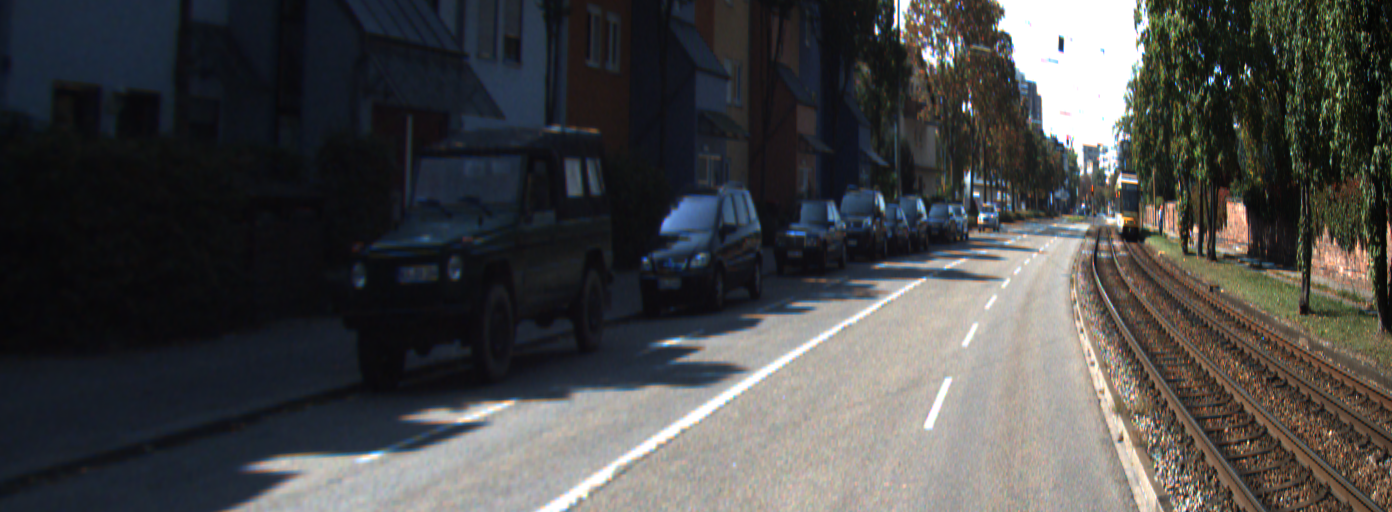

In [ ]:
# Assuming you have the homography matrix stored in 'homography'

# Specify the desired dimensions or scaling factor for the unwarped image
desired_width = 1392
desired_height = 512

# Calculate the output size based on the desired dimensions
output_size = (desired_width, desired_height)

# Unwarp the image
unwarped_img = cv2.warpPerspective(warped_img_int8, homography, output_size)

# Display the unwarped image
cv2_imshow(unwarped_img)



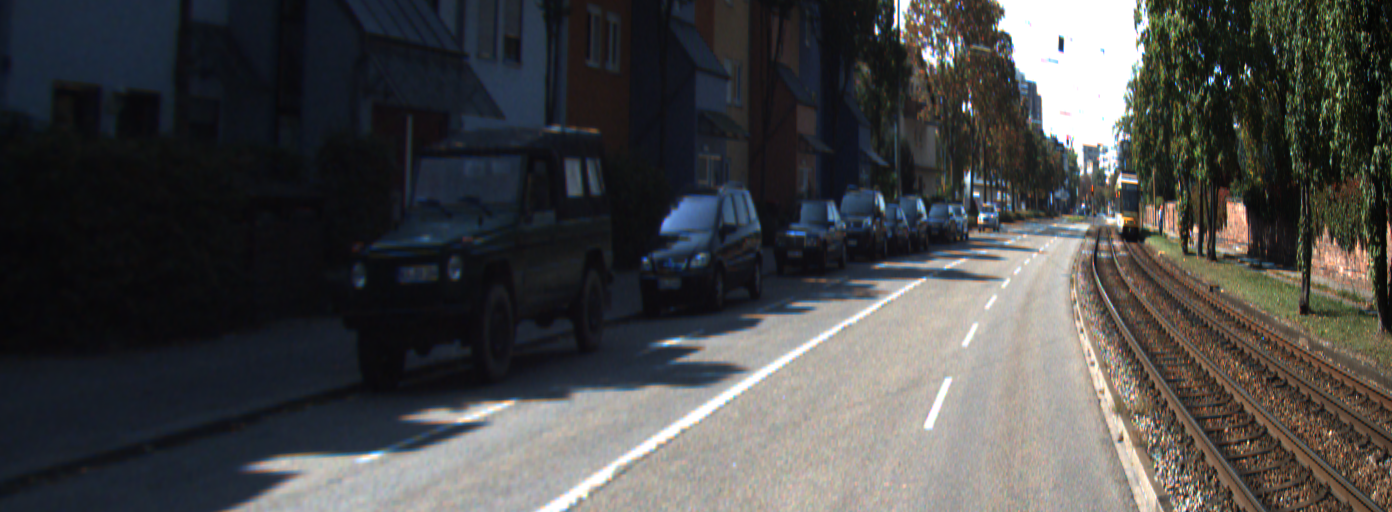

In [ ]:
cv2_imshow(rec_warp[1])

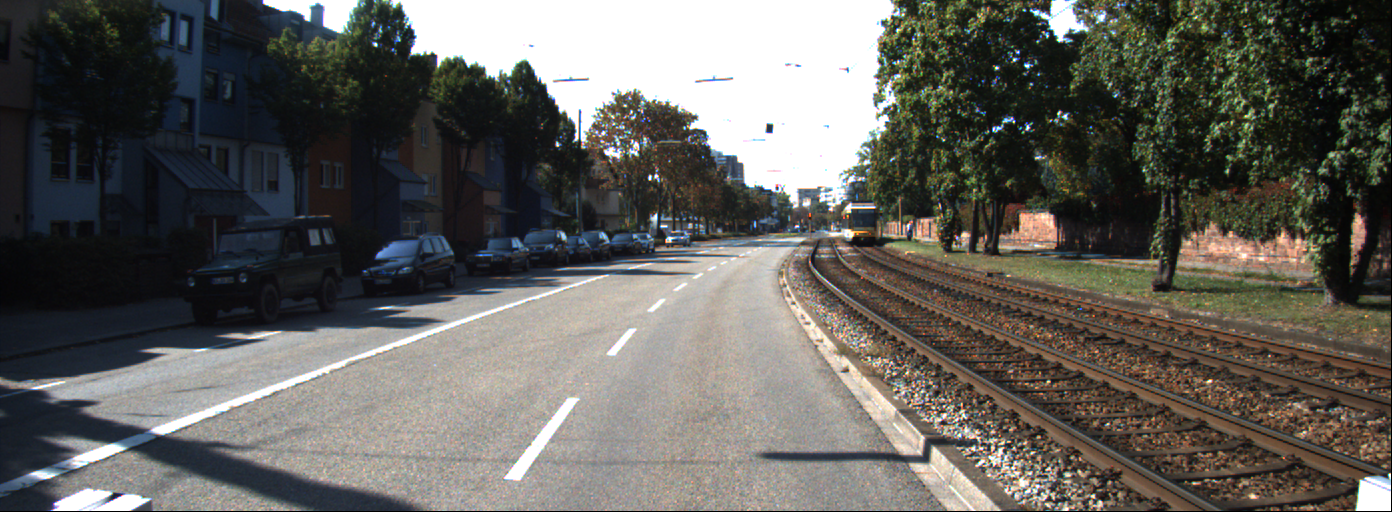

In [ ]:
cv2_imshow(rec_in[1])

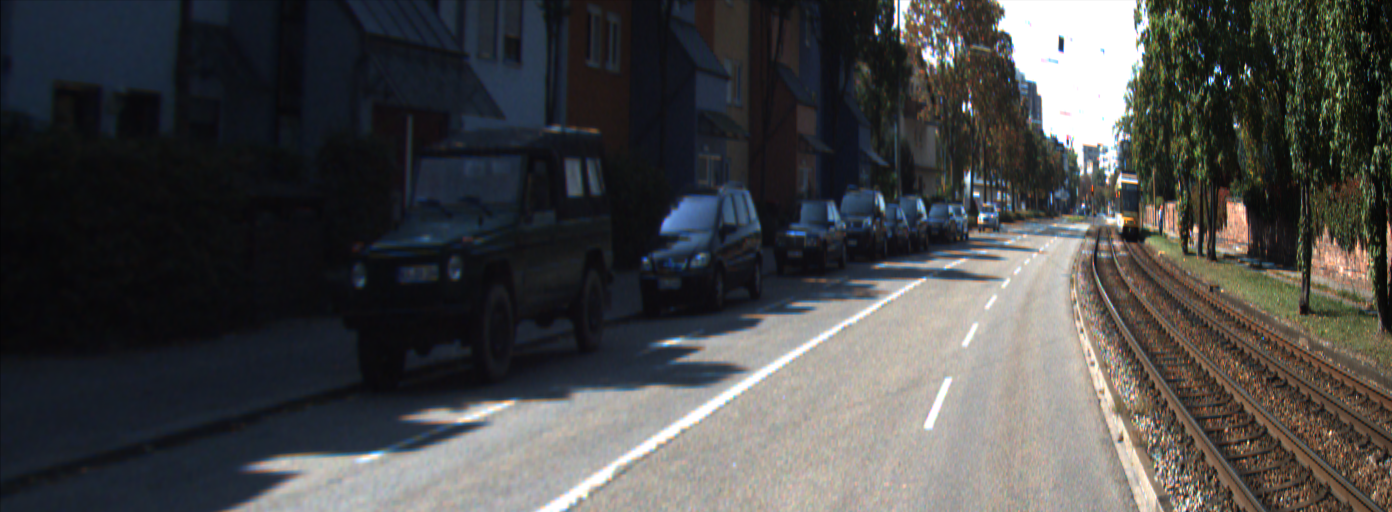

In [ ]:
ratio = 0.75

# Perform feature detection and extraction
kp1, descriptors1 = sift.detectAndCompute(gray, None)
kp2, descriptors2 = sift.detectAndCompute(warped_img_int8, None)

# Create a BFMatcher object
matcher = cv2.BFMatcher()

# Match features between the two images
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)

# Extract corresponding keypoints from the good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate homography using RANSAC
homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Unwarp the image
desired_width = warped_img_int8.shape[1]
desired_height = warped_img_int8.shape[0]
output_size = (desired_width, desired_height)
unwarped_img = cv2.warpPerspective(warped_img_int8, homography, output_size)
cv2_imshow(unwarped_img)

In [ ]:
(unwarped_img/255).shape

(512, 1392, 3)

In [ ]:
(rec_in[0]/255).shape

(512, 1392, 3)

In [ ]:
def calculate_homography(src_pts, dst_pts):
    # Calculate the homography matrix using RANSAC
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return homography

def unwarp_image(img, homography):
    # Unwarp the image using the homography matrix
    height, width = img.shape[:2]
    unwarped_img = cv2.warpPerspective(img, homography, (width, height))
    return unwarped_img


# Load the images (warped and original)
warped_img = rec_warp[0]
original_img = rec_in[0]

# Convert the images to grayscale
warped_gray = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for the images
keypoints1, descriptors1 = sift.detectAndCompute(warped_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(original_gray, None)

# Match the keypoints using a brute-force matcher
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Get the matched keypoints' coordinates
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Calculate the homography matrix
homography = calculate_homography(src_pts, dst_pts)

# Unwarp the image using the homography matrix
unwarped_img = unwarp_image(warped_img, homography)

In [ ]:
unwarped_imgs = []
for i in range(len(rec_warp)):
  warped_img = rec_warp[i]
  original_img = rec_in[i]

  warped_gray = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
  original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

  sift = cv2.SIFT_create()

  keypoints1, descriptors1 = sift.detectAndCompute(warped_gray, None)
  keypoints2, descriptors2 = sift.detectAndCompute(original_gray, None)

  matcher = cv2.BFMatcher()
  matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

  good_matches = []
  for m, n in matches:
      if m.distance < 0.75 * n.distance:
          good_matches.append(m)

  src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
  dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

  homography = calculate_homography(src_pts, dst_pts)

  unwarped_img = unwarp_image(warped_img, homography)
  unwarped_imgs.append(unwarped_img)

## SNR SSIM calculation

In [ ]:
total_snr =0
total_str = 0
for i in range(len(unwarped_imgs)):
  snr, stru = psnr_ssim_rect(rec_in[i] ,unwarped_imgs[i])
  total_snr += snr
  total_str += stru
print(total_snr/len(unwarped_imgs))
print(total_str/len(unwarped_imgs))

<ipython-input-14-eccbf539ab0e>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grid = thresh.astype(np.bool)
<ipython-input-14-eccbf539ab0e>:26: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_out = ssim(cropped_img, cropped_img_rect, multichannel=True)


32.41779025326615
0.9602299073995627


In [ ]:
psnr_ssim_rect(original_img ,unwarped_img)

<ipython-input-14-eccbf539ab0e>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grid = thresh.astype(np.bool)
<ipython-input-14-eccbf539ab0e>:26: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_out = ssim(cropped_img, cropped_img_rect, multichannel=True)


(32.23719300794751, 0.9707678969145518)

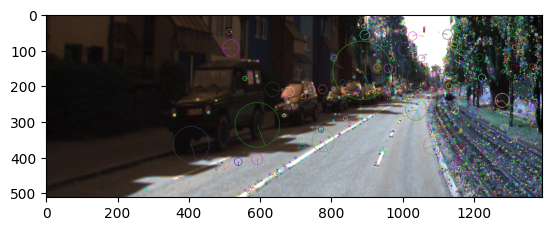

In [ ]:
plt.imshow(img_kp)
plt.show()

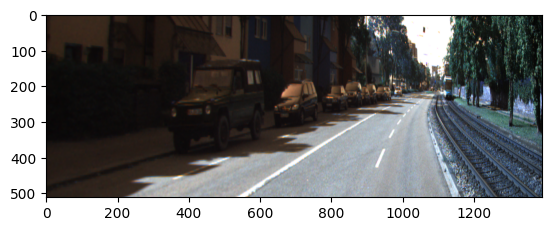

In [ ]:
plt.imshow(warped_img_int8)

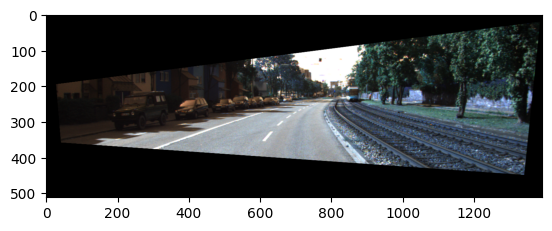

In [ ]:
plt.imshow(unwarped_imgs[1])

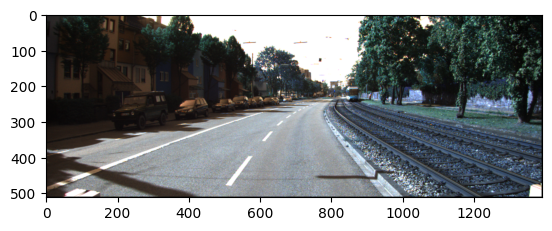

In [ ]:
plt.imshow(rec_in[1])

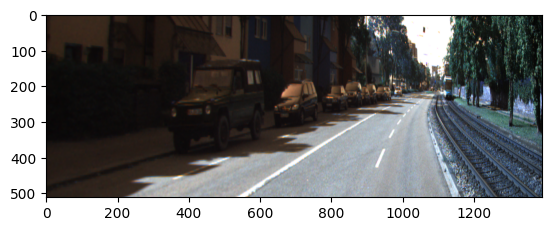

In [ ]:
plt.imshow(rec_warp[1])

# Part 2

In [ ]:
#limg = stereo_left
block_size = 5
max_disparity = 16 #must be multiples of 16
rmse_sum = 0

left_img = stereo_left[0]
right_img = stereo_right[0]
disp_gt_img = stereo_disp[0].astype(np.float32)
stereo = cv2.StereoBM_create(numDisparities = max_disparity, blockSize = block_size)
disparity = stereo.compute(left_img,right_img)
disparity = cv2.normalize(disparity, None, alpha = 0, beta = max_disparity, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

mask = np.logical_or(disparity ==0, disp_gt_img == 0)
masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask = mask)
rmse = np.sqrt(masked_sq_err.mean())

In [ ]:
def grid_search(stereo_left, stereo_right, stereo_disp):
    best_rmse = np.inf
    best_params = None
    iter = 0
    temp_block = 0

    for block_size in range(5, 22, 2):  # Iterate over different odd block sizes
        for uniqueness_ratio in [5, 10, 5]:  # Iterate over different uniqueness ratios
            for speckle_window_size in [50, 100, 50]:  # Iterate over different speckle window sizes
                rmse_sum = 0
                iter += 1
                print(iter)
                if block_size != temp_block:
                    temp_block = block_size
                    print(block_size)

                for i in range(len(stereo_left)):
                    left_img = stereo_left[i]
                    right_img = stereo_right[i]
                    disp_gt_img = stereo_disp[i].astype(np.float32)

                    # Check if block_size is within image dimensions
                    if block_size > min(left_img.shape[0], left_img.shape[1]):
                        continue

                    stereo = cv2.StereoSGBM_create(
                        blockSize=block_size,
                        uniquenessRatio=uniqueness_ratio,
                        speckleWindowSize=speckle_window_size,
                        speckleRange=2,  # Fixed value for speckle range
                        preFilterCap=1,  # Fixed value for pre-filter cap
                        P1=block_size ** 2,  # Fixed value for P1
                        P2=8 * block_size ** 2  # Fixed value for P2
                    )
                    disparity = stereo.compute(left_img, right_img)
                    disparity = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX,
                                               dtype=cv2.CV_8U)

                    mask = np.logical_or(disparity == 0, disp_gt_img == 0)
                    masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask=mask)
                    rmse = np.sqrt(masked_sq_err.mean())

                    rmse_sum += rmse

                avg_rmse = rmse_sum / len(stereo_left)

                if avg_rmse < best_rmse:
                    best_rmse = avg_rmse
                    best_params = (block_size, uniqueness_ratio, speckle_window_size)

    return best_params, best_rmse
best_params, best_rmse = grid_search(stereo_left, stereo_right, stereo_disp)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


9
10
7
11
12
13
14
15
16
17
18
19
9
20
21
22
23
24
25
26
27
28
11
29
30
31
32
33
34
35
36
37
13
38
39
40
41
42
43
44
45
46
15
47
48
49
50
51
52
53
54
55
17
56
57
58
59
60
61
62
63
64
19
65
66
67
68
69
70
71
72
73
21
74
75
76
77
78
79
80
81
Best parameters: (5, 5, 50)
Best RMSE: 154.46317893963447


In [ ]:
import numpy as np
import cv2

def grid_search(stereo_left, stereo_right, stereo_disp):
    best_rmse = np.inf
    best_params = None
    iter = 0
    temp_block = 0
    for block_size in range(5, 22, 2):  # Iterate over different odd block sizes
        for max_disparity in range(16, 161, 16):  # Iterate over different max disparities
            for min_disparity in range(0, 16, 8):  # Iterate over different min disparities
                for uniqueness_ratio in [5, 10, 5]:  # Iterate over different uniqueness ratios
                    for speckle_window_size in [50, 100, 50]:  # Iterate over different speckle window sizes
                        for speckle_range in [1, 2, 2]:  # Iterate over different speckle ranges
                            for pre_filter_cap in [1, 5, 2]:  # Iterate over different pre-filter caps
                                for p1 in [1, 10, 5]:  # Iterate over different P1 values
                                    rmse_sum = 0
                                    iter+=1
                                    print(iter)
                                    print(block_size)

                                    for i in range(len(stereo_left)):
                                        left_img = stereo_left[i]
                                        right_img = stereo_right[i]
                                        disp_gt_img = stereo_disp[i].astype(np.float32)

                                        # Check if block_size is within image dimensions
                                        if block_size > min(left_img.shape[0], left_img.shape[1]):
                                            continue

                                        stereo = cv2.StereoSGBM_create(
                                            minDisparity=min_disparity,
                                            numDisparities=max_disparity,
                                            blockSize=block_size,
                                            uniquenessRatio=uniqueness_ratio,
                                            speckleWindowSize=speckle_window_size,
                                            speckleRange=speckle_range,
                                            preFilterCap=pre_filter_cap,
                                            P1=p1 * 3 * block_size ** 2,
                                            P2=32 * 3 * block_size ** 2
                                        )
                                        disparity = stereo.compute(left_img, right_img)
                                        disparity = cv2.normalize(disparity, None, alpha=0, beta=max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

                                        mask = np.logical_or(disparity == 0, disp_gt_img == 0)
                                        masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask=mask)
                                        rmse = np.sqrt(masked_sq_err.mean())

                                        rmse_sum += rmse

                                    avg_rmse = rmse_sum / len(stereo_left)

                                    if avg_rmse < best_rmse:
                                        best_rmse = avg_rmse
                                        best_params = (block_size, max_disparity, min_disparity, uniqueness_ratio, speckle_window_size, speckle_range, pre_filter_cap, p1)

    return best_params, best_rmse


# Usage example

best_params, best_rmse = grid_search(stereo_left, stereo_right, stereo_disp)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


In [ ]:
import numpy as np
import cv2

def grid_search(stereo_left, stereo_right, stereo_disp):
    best_rmse = np.inf
    best_params = None

    for block_size in range(5, 44, 2):  # Iterate over different odd block sizes
        for max_disparity in range(16, 321, 16):  # Iterate over different max disparities
            rmse_sum = 0

            for i in range(len(stereo_left)-1):
                left_img = stereo_left[i]
                right_img = stereo_right[i]
                disp_gt_img = stereo_disp[i].astype(np.float32)

                # Check if block_size is within image dimensions
                if block_size > min(left_img.shape[0], left_img.shape[1]):
                    continue

                stereo = cv2.StereoSGBM_create(
                    minDisparity=0,
                    numDisparities=max_disparity,
                    blockSize=block_size,
                    P1=8 * 3 * block_size ** 2,
                    P2=32 * 3 * block_size ** 2
                )
                disparity = stereo.compute(left_img, right_img)
                disparity = cv2.normalize(disparity, None, alpha=0, beta=max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

                mask = np.logical_or(disparity == 0, disp_gt_img == 0)
                masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask=mask)
                rmse = np.sqrt(masked_sq_err.mean())

                rmse_sum += rmse

            avg_rmse = rmse_sum / len(stereo_left)

            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_params = (block_size, max_disparity)

    return best_params, best_rmse

# Usage example


best_params, best_rmse = grid_search(stereo_left, stereo_right, stereo_disp)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


Best parameters: (13, 80)
Best RMSE: 3.3400556956459715


In [ ]:
import numpy as np
import cv2

def grid_search_single_image(image_left, image_right, disp_gt, speckle_window_range, uniqueness_ratio_range):
    best_rmse = np.inf
    best_params = None

    for speckle_window in speckle_window_range:
        for uniqueness_ratio in uniqueness_ratio_range:
            rmse_sum = 0

            block_size = 9

            stereo = cv2.StereoSGBM_create(
                minDisparity=0,
                numDisparities=64,
                blockSize=block_size,
                speckleWindowSize=speckle_window,
                uniquenessRatio=uniqueness_ratio,
                P1=8 * 3 * block_size ** 2,
                P2=32 * 3 * block_size ** 2
            )

            disparity = stereo.compute(image_left, image_right)
            disparity = cv2.normalize(disparity, None, alpha=0, beta=64, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

            mask = np.logical_or(disparity == 0, disp_gt == 0)
            masked_sq_err = np.ma.array(np.square(disparity - disp_gt), mask=mask)
            rmse = np.sqrt(masked_sq_err.mean())

            best_params_str = f"Block Size: {block_size}, Speckle Window: {speckle_window}, Uniqueness Ratio: {uniqueness_ratio}"
            print(f"RMSE for {best_params_str}: {rmse}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (block_size, speckle_window, uniqueness_ratio)

    return best_params, best_rmse


image_left = stereo_left[0]
image_right = stereo_right[0]
disp_gt = stereo_disp[0].astype(np.float32)

speckle_window_range = range(100, 301, 50)
uniqueness_ratio_range = np.arange(0.7, 1.1, 0.1)

best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, speckle_window_range, uniqueness_ratio_range)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


In [ ]:
import numpy as np
import cv2

def grid_search(stereo_left, stereo_right, stereo_disp):
    best_rmse = np.inf
    best_params = None

    for block_size in range(5, 22, 2):
        for max_disparity in range(16, 161, 16):
            rmse_sum = 0

            for i in range(len(stereo_left)):
                left_img = stereo_left[i]
                right_img = stereo_right[i]
                disp_gt_img = stereo_disp[i].astype(np.float32)
                #print(i)

                stereo = cv2.StereoBM_create(numDisparities=max_disparity, blockSize=block_size)
                disparity = stereo.compute(left_img, right_img)
                disparity = cv2.normalize(disparity, None, alpha=0, beta=max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

                mask = np.logical_or(disparity == 0, disp_gt_img == 0)
                masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask=mask)
                rmse = np.sqrt(masked_sq_err.mean())

                rmse_sum += rmse

            avg_rmse = rmse_sum / len(stereo_left)

            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_params = (block_size, max_disparity)

    return best_params, best_rmse
left_img = stereo_left[0]
right_img = stereo_right[0]
disp_gt_img = stereo_disp[0].astype(np.float32)
#stereo_left = [...]  # List of left stereo images
#stereo_right = [...]  # List of right stereo images
#stereo_disp = [...]  # List of ground truth disparity images

best_params, best_rmse = grid_search(stereo_left, stereo_right, stereo_disp)
#best_params, best_rmse = grid_search(left_img, right_img, disp_gt_img)
print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)


In [ ]:
import numpy as np
import cv2

def grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range):
    best_rmse = np.inf
    best_params = None

    for block_size in block_size_range:
        for max_disparity in max_disparity_range:
            for speckle_window in speckle_window_range:
                for uniqueness_ratio in uniqueness_ratio_range:
                    rmse_sum = 0

                    stereo = cv2.StereoSGBM_create(
                        minDisparity=0,
                        numDisparities=max_disparity,
                        blockSize=block_size,
                        speckleWindowSize=speckle_window,
                        uniquenessRatio=uniqueness_ratio,
                        P1=8 * 3 * block_size ** 2,
                        P2=32 * 3 * block_size ** 2
                    )

                    disparity = stereo.compute(image_left, image_right)
                    disparity = cv2.normalize(disparity, None, alpha=0, beta=max_disparity, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

                    mask = np.logical_or(disparity == 0, disp_gt == 0)
                    masked_sq_err = np.ma.array(np.square(disparity - disp_gt), mask=mask)
                    rmse = np.sqrt(masked_sq_err.mean())

                    best_params_str = f"Block Size: {block_size}, Max Disparity: {max_disparity}, Speckle Window: {speckle_window}, Uniqueness Ratio: {uniqueness_ratio}"
                    print(f"RMSE for {best_params_str}: {rmse}")

                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = (block_size, max_disparity, speckle_window, uniqueness_ratio)

    return best_params, best_rmse

image_left = stereo_left[0]
image_right = stereo_right[0]
disp_gt = stereo_disp[0].astype(np.float32)

block_size_range = range(5, 50, 5)
max_disparity_range = range(16, 321, 32)
speckle_window_range = range(100, 301, 50)
uniqueness_ratio_range = np.arange(5, 20, 5)

#best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

#print("Best parameters:", best_params)
#print("Best RMSE:", best_rmse)


NameError: ignored

## Indivudal Image optimization and rmse calculation

In [ ]:
image_left = stereo_left[0]
image_right = stereo_right[0]
disp_gt = stereo_disp[0].astype(np.float32)
best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

NameError: ignored

In [ ]:
print(best_params)
print(best_rmse)

In [ ]:
15, 80, 300, 15
stereo = cv2.StereoSGBM_create(
                        minDisparity=0,
                        numDisparities=80,
                        blockSize=15,
                        speckleWindowSize=300,
                        uniquenessRatio=15,
                        P1=8 * 3 * 15 ** 2,
                        P2=32 * 3 * 15 ** 2
                    )

disparity = stereo.compute(stereo_left[4], stereo_right[4])
disparity = cv2.normalize(disparity, None, alpha=0, beta=80, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

mask = np.logical_or(disparity == 0, disp_gt == 0)
masked_sq_err = np.ma.array(np.square(disparity - disp_gt), mask=mask)

In [ ]:
masked_disp = np.ma.array(disparity, mask=mask)

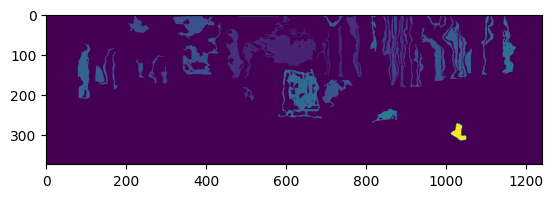

In [ ]:
plt.imshow(disparity)



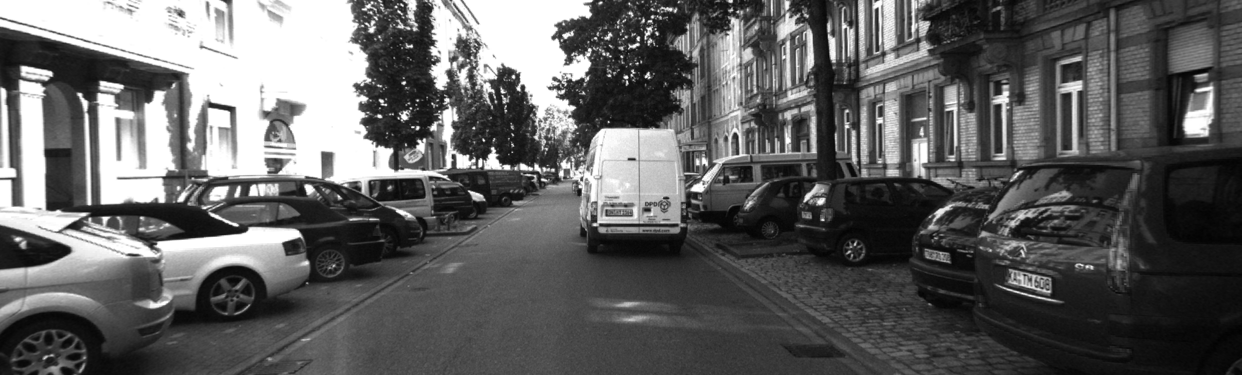

In [ ]:
cv2_imshow(stereo_left[4])

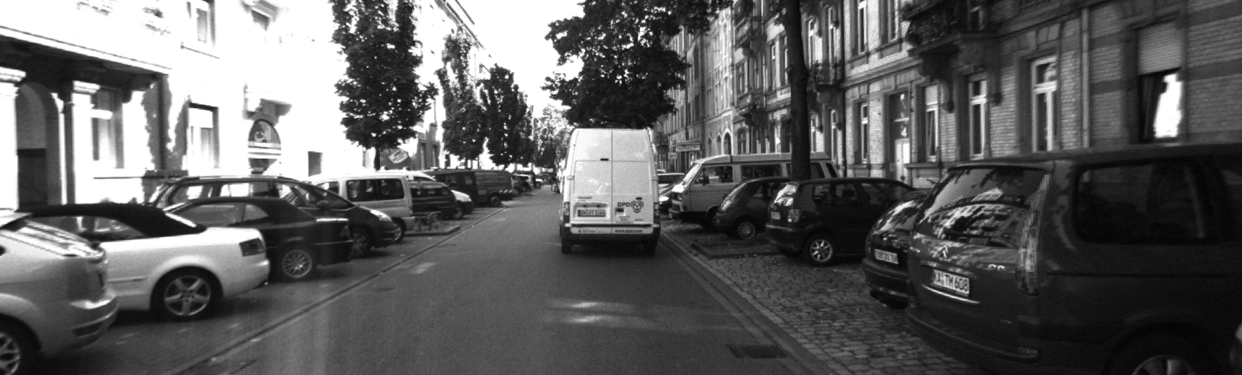

In [ ]:
cv2_imshow(stereo_right[4])

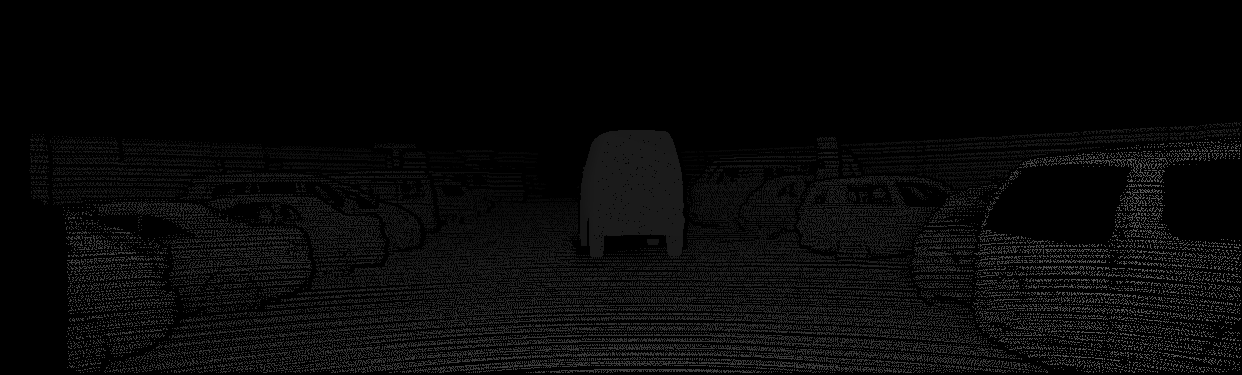

In [ ]:
cv2_imshow(stereo_disp[4])

In [ ]:
image_left = stereo_left[1]
image_right = stereo_right[1]
disp_gt = stereo_disp[1].astype(np.float32)
best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

In [ ]:
print(best_params)
print(best_rmse)

In [ ]:
image_left = stereo_left[2]
image_right = stereo_right[2]
disp_gt = stereo_disp[2].astype(np.float32)
best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 5: 13.124333127925794
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 10: 12.82156494267641
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 15: 12.248963534284588
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 5: 12.885005194713036
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 10: 12.58451109796864
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 15: 12.1788616613366
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 5: 12.527561918054708
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 10: 11.787157193435544
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 15: 11.272257020735701
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 250

In [ ]:
print(best_params)
print(best_rmse)

(15, 48, 200, 15)
3.261106742480236


In [ ]:
image_left = stereo_left[3]
image_right = stereo_right[3]
disp_gt = stereo_disp[3].astype(np.float32)
best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 5: 22.85130514952962
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 10: 22.550052656393415
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 15: 21.859280443314507
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 5: 22.948396685481825
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 10: 22.539775656663988
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 15: 21.61228491232959
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 5: 22.952987779391716
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 10: 22.374261750945397
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 15: 21.40078613144387
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 25

In [ ]:
print(best_params)
print(best_rmse)

(5, 80, 150, 15)
2.4576377570705565


In [ ]:
image_left = stereo_left[4]
image_right = stereo_right[4]
disp_gt = stereo_disp[4].astype(np.float32)
best_params, best_rmse = grid_search_single_image(image_left, image_right, disp_gt, block_size_range, max_disparity_range, speckle_window_range, uniqueness_ratio_range)

RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 5: 26.612292387356135
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 10: 26.026340785309145
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 100, Uniqueness Ratio: 15: 25.026454241719954
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 5: 26.198401523775694
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 10: 25.53002063976895
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 150, Uniqueness Ratio: 15: 24.87650270007052
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 5: 25.80413500460829
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 10: 24.977968791601096
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 200, Uniqueness Ratio: 15: 24.242339275669103
RMSE for Block Size: 5, Max Disparity: 16, Speckle Window: 25

In [ ]:
print(best_params)
print(best_rmse)

(15, 80, 300, 15)
3.250184826223818


In [ ]:
#img 0
#Best parameters: (15, 80, 250, 15)
#Best RMSE: 1.4684654225585085
#img 1
# Best parameters:5,80,150,5
#Best RMSE: 1.6703212786604207
#img 2
#Best parameters(15, 48, 200, 15)
#Best RMSE:3.261106742480236
#img 3
#Best parameters(5, 80, 150, 15)
#Best RMSE:2.4576377570705565
#img 4
#Best parameters(15, 80, 300, 15)
#Best RMSE:3.250184826223818

3.261106742480236

In [ ]:
(5, 80, 150, 15)
2.4576377570705565
#Best parameters: (21, 96)
#Best RMSE: 4.367593166282199

#limg = stereo_left
block_size = 21
max_disparity = 96 #must be multiples of 16
rmse_sum = 0
for i in range(len(stereo_left)):
  left_img = stereo_left[i]
  right_img = stereo_right[i]
  disp_gt_img = stereo_disp[i].astype(np.float32)
  stereo = cv2.StereoBM_create(numDisparities = max_disparity, blockSize = block_size)
  disparity = stereo.compute(left_img,right_img)
  disparity = cv2.normalize(disparity, None, alpha = 0, beta = max_disparity, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  mask = np.logical_or(disparity ==0, disp_gt_img == 0)
  masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask = mask)
  rmse = np.sqrt(masked_sq_err.mean())
  print(rmse)

3.3537182221145887
3.8882016716586953
3.0852903054093566
5.737680860876886
5.773074771351468


In [ ]:
block_size = 13
max_disparity = 80
rmse_sum = 0
for i in range(len(stereo_left)):
  left_img = stereo_left[i]
  right_img = stereo_right[i]
  disp_gt_img = stereo_disp[i].astype(np.float32)
  stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=max_disparity,
    blockSize=block_size,
    P1=8 * 3 * block_size ** 2,
    P2=32 * 3 * block_size ** 2)
  disparity = stereo.compute(left_img,right_img)
  disparity = cv2.normalize(disparity, None, alpha = 0, beta = max_disparity, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  mask = np.logical_or(disparity ==0, disp_gt_img == 0)
  masked_sq_err = np.ma.array(np.square(disparity - disp_gt_img), mask = mask)
  rmse = np.sqrt(masked_sq_err.mean())
  print(rmse)

2.2274042813563852
3.390294752618548
4.072554671683422
7.010024772571504
9.160064399894502
